In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

### 1.Load in Data

Text(0, 0.5, 'y (m)')

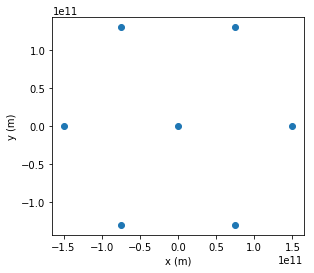

In [2]:
from astr2600.nbody import hexagon
%matplotlib inline
# create a cartoon sample of particles
masses, positions, velocities = hexagon()
# extract the x and y components of all the particles
x = positions[:,0]
y = positions[:,1]
# plot these the positions of these particles
plt.scatter(x, y)
plt.axis('scaled')
plt.xlabel('x (m)')
plt.ylabel('y (m)')
#plt.show()

### 2. Net Force

In [3]:
def forceMagnitude(mi, mj, sep):
    """
    Compute magnitude of gravitational force between two particles.

    Parameters
    ----------
    mi, mj : float
        Particle masses in kg.
    sep : float
        Particle separation (distance between particles) in m.

    Returns
    -------
    force : float
        Gravitational force between particles in N.

    Example
    -------
        Input:
            mEarth = 6.0e24     # kg
            mPerson = 70.0      # kg
            radiusEarth = 6.4e6 # m
            print(magnitudeOfForce(mEarth, mPerson, radiusEarth))
        Output:
            683.935546875
    """
    G = 6.67e-11                # m3 kg-1 s-2
    return G * mi * mj / sep**2 # N

def magnitude(vec):
    """
    Compute magnitude of any vector with an arbitrary number of elements.

    Parameters
    ----------
    vec : numpy array
        Any vector

    Returns
    -------
    magnitude : float
        The magnitude of that vector.

    Example
    -------
        Input:
            print(magnitude(np.array([3.0, 4.0, 0.0])))
        Output:
            5.0
    """
    return np.sqrt(np.sum(vec**2))

def unitDirectionVector(pos_a, pos_b):
    """
    Create unit direction vector from pos_a to pos_b

    Parameters
    ----------
    pos_a, pos_b : two numpy arrays
        Any two vectors

    Returns
    -------
    unit direction vector : one numpy array (same size input vectors)
        The unit direction vector from pos_a toward pos_b

    Example
    -------
        Input:
            someplace = np.array([3.0,2.0,5.0])
            someplaceelse = np.array([1.0, -4.0, 8.0])
            print(unitDirectionVector(someplace, someplaceelse))
        Output:
            [-0.28571429, -0.85714286,  0.42857143]
    """

    # calculate the separation between the two vectors
    separation = pos_b - pos_a

    # divide vector components by vector magnitude to make unit vector
    return separation/magnitude(separation)

def forceVector(mi, mj, pos_i, pos_j):
    """
    Compute gravitational force vector exerted on particle i by particle j.

    Parameters
    ----------
    mi, mj : floats
        Particle masses, in kg.
    pos_i, pos_j : numpy arrays
        Particle positions in cartesian coordinates, in m.

    Returns
    -------
    forceVec : numpy array
        Components of gravitational force vector, in N.

    Example
    -------
        Input:
            mEarth = 6.0e24     # kg
            mPerson = 70.0      # kg
            radiusEarth = 6.4e6 # m
            centerEarth = np.array([0,0,0])
            surfaceEarth = np.array([0,0,1])*radiusEarth
            print(forceVector(mEarth, mPerson, centerEarth, surfaceEarth))

        Output:
            [   0.            0.          683.93554688]


    """

    # compute the magnitude of the distance between positions
    distance = magnitude(pos_i - pos_j)
    # this distance is in meters, because pos_i and pos_j were

    # compute the magnitude of the force
    force = forceMagnitude(mi, mj, distance)
    # the magnitude of the force is in Newtons

    # calculate the unit direction vector of the force
    direction = unitDirectionVector(pos_i, pos_j)
    # this vector is unitless, its magnitude should be 1.0

    return force*direction # a numpy array, with units of Newtons


In [4]:
def netforcevector(mi,pos):
    """
    Compute Net gravitational force vector exerted on particle i by particle j.

    Parameters
    ----------
    mi, mj : floats
        Particle masses, in kg.
    pos_i, pos_j : numpy arrays
        Particle positions in cartesian coordinates, in m.

    Returns
    -------
    netforceVec : numpy array
        Components of net force vector, in N.
    """
    
    N = 0
    netforce = []
    allnetforce = []
    j = 0
    #netforce = np.empty((,3))
    for j in range(0,len(mi)):
        netforce = []
        for i in range(0,len(mi)):
            if j != i:
                m1 = mi[j]
                m2 = mi[i]
                pos_1 = pos[j,:]
                pos_2 = pos[i,:]
                #print(m1,m2,pos_1,pos_2)
                netforce.append(forceVector(m1, m2, pos_1, pos_2))
                #print('the forces on partical j =',j)
                #print(netforce)
                #netforce = np.append(netforce,forceVector(m1, m2, pos_1, pos_2),axis=0)
                #netforce = np.concatenate((netforce,forceVector(m1, m2, pos_1, pos_2)),axis = 0)
                N +=1
                # np.sum(netforce,axis=0)
                vect = np.array(netforce).sum(axis=0)
        allnetforce = allnetforce+[vect]
    return np.array(allnetforce)
    
    
    
    

In [5]:
a = netforcevector(masses,positions)
a

array([[-1.18120451e+25,  1.67772160e+07,  0.00000000e+00],
       [-5.90602256e+24, -1.02295311e+25,  0.00000000e+00],
       [ 5.90602256e+24, -1.02295311e+25,  0.00000000e+00],
       [ 1.18120451e+25, -1.45388125e+09,  0.00000000e+00],
       [ 5.90602256e+24,  1.02295311e+25,  0.00000000e+00],
       [-5.90602256e+24,  1.02295311e+25,  0.00000000e+00],
       [-9.66367642e+09, -2.14748365e+09,  0.00000000e+00]])

### 3. Test out Net Force

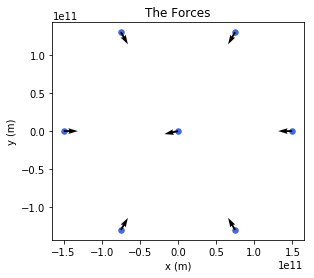

In [6]:
# pull out the x, y, z components of the Earth position
x = positions[:,0]
y = positions[:,1]

# pull out the x, y, z, components of the force on the P0
Fx = netforcevector(masses,positions)[:,0]
Fy = netforcevector(masses,positions)[:,1]

# plot the prac (dot + its force)
plt.scatter(x, y, color='royalblue', s=30)
for i in range(0,len(Fx)):
    
    plt.quiver(x[i],y[i],Fx[i], Fy[i])


plt.axis('scaled')
plt.xlabel('x (m)')
plt.ylabel('y (m)')
plt.title('The Forces');

In [7]:
import numpy as np

def leapfrogUpdateParticles(masses, positions, velocities, dt):
    """
    Evolve particles in time via leap-frog integrator scheme. This function
    takes masses, positions, velocities, and a time step dt as inputs.
    If the positions and velocities are measured at some time "t",
    this function returns the predicted positions and velocities as
    some later time "t + dt".

    Parameters
    ----------
    masses : np.ndarray
        1-D array containing masses for all particles, in kg
        It has length N, where N is the number of particles.
    positions : np.ndarray
        2-D array containing (x, y, z) positions for all particles.
        Shape is (N, 3) where N is the number of particles.
    velocities : np.ndarray
        2-D array containing (x, y, z) velocities for all particles.
        Shape is (N, 3) where N is the number of particles.
    dt : float
        Evolve system for time dt (in seconds).

    Returns
    -------
    newpositions : np.ndarray
        Update particle positions at a time "dt" into the future.
        2-D array containing (x, y, z) positions for all particles.
        Shape is (N, 3) where N is the number of particles.
    newvelocities : np.ndarray
        Update particle velocities at a time "dt" into the future.
        2-D array containing (x, y, z) velocities for all particles.
        Shape is (N, 3) where N is the number of particles.
    """

    # in the variable-naming we use inside this function
    #   "starting..." refers to quantities at time "t"
    #   "ending..." refers to quantities at time "t + dt"

    # keep track of the starting positions for the particles
    startingPositions = np.asarray(positions)
    startingVelocities = np.asarray(velocities)
    # (np.asarray will convert a list of 1D arrays into one 2D numpy array)

    # how many particles are there? how many dimensions? (likely 3 for xyz)
    nParticles, nDimensions = startingPositions.shape

    # the arrays for positions and velocities should have the same shape
    assert(startingVelocities.shape == startingPositions.shape)
    assert(len(masses) == nParticles)

    # calculate net force vectors on all particles, at the starting position
    startingForces = np.asarray(netforcevector(masses, startingPositions))

    # create a reshaped array of masses that are easily divided into 2D arrays
    reshaped_masses = np.asarray(masses).reshape(nParticles, 1)

    # calculate the acceleration due to gravity, at the starting position
    startingAccelerations = startingForces/reshaped_masses

    # calculate the ending position
    nudge = startingVelocities*dt + 0.5*startingAccelerations*dt**2
    endingPositions = startingPositions + nudge

    # calculate net force vectors on all particles, at the ending position
    endingForces = np.asarray(netforcevector(masses, endingPositions))

    # calculate the acceleration due to gravity, at the ending position
    endingAccelerations = endingForces/reshaped_masses

    # calculate the ending velocity, using an average of the accelerations
    endingVelocities = (startingVelocities +
                        0.5*(endingAccelerations + startingAccelerations)*dt)

    # return the the positions and velocities after this step
    return endingPositions, endingVelocities


### 5.Test Leap frog

In [8]:
Emass,Eposition,Evelocity = np.array([5.972e24,1]),np.array([[0,0,0],[6.4e6,0,0]]),np.array([[0,0,0],[0,0,0]])
#Earth and Book's mass.position,velocity

In [9]:
newpos,newvect = leapfrogUpdateParticles(Emass, Eposition, Evelocity, 1)

In [10]:
newpos[1][0]-Eposition[1][0]

-4.86245605442673

In [11]:
newpos

array([[8.14208984e-25, 0.00000000e+00, 0.00000000e+00],
       [6.39999514e+06, 0.00000000e+00, 0.00000000e+00]])

#### Emass
• How fast (and in what direction) should the book to be moving at the end of that 1 second? 9.8 m/s

• How far should the book have fallen during that 1 second? 4.9 m

### 6. Estimation of Euler's method
•How fast (and in what direction) should the book to be moving at the end of that 1 second? 9.8 m/s

• How far should the book have fallen during that 1 second? 0 m

### 7.

In [12]:
def Motion(masses,inpos,invec,totaltime,timestep):
    """
    Evolve particles in time via leap-frog integrator scheme. This function
    takes masses, positions, velocities, total time and a time step dt as inputs.
    If the positions and velocities are measured at some time "t",
    this function returns the predicted positions and velocities as
    some later time "t + dt".

    Parameters
    ----------
    masses : np.ndarray
        1-D array containing masses for all particles, in kg
        It has length N, where N is the number of particles.
    positions : np.ndarray
        2-D array containing (x, y, z) positions for all particles.
        Shape is (N, 3) where N is the number of particles.
    velocities : np.ndarray
        2-D array containing (x, y, z) velocities for all particles.
        Shape is (N, 3) where N is the number of particles.
    time : total time  unit in second
    dt : float
        Evolve system for time dt (in seconds).

    Returns
    -------
    time :np.array 
        time steps in the range of total time 
    newpositions : np.ndarray
        Update particle positions at a time "dt" into the future.
        2-D array containing (x, y, z) positions for all particles.
        Shape is (N, 3) where N is the number of particles.
    newvelocities : np.ndarray
        Update particle velocities at a time "dt" into the future.
        2-D array containing (x, y, z) velocities for all particles.
        Shape is (N, 3) where N is the number of particles.
    """
    pos = []
    vect = []
    times = np.arange(0,totaltime,timestep)
    for i in range(0,len(times)):
        if i == 0:
            newpos,newvect = leapfrogUpdateParticles(masses,inpos,invec,timestep)
            pos = pos+[list(newpos)]
            vect = vect+[list(newvect)]
        elif i !=0:
            newpos,newvect = leapfrogUpdateParticles(masses,newpos,newvect,timestep)
            pos = pos+[list(newpos)]
            vect = vect+[list(newvect)]
            
    
    return times,np.array(pos),np.array(vect)

In [13]:
newpos,newvect = leapfrogUpdateParticles(Emass, Eposition, Evelocity, 1)

In [14]:
time,position,velocity = Motion(masses,positions,velocities,5,1)
time,position,velocity


(array([0, 1, 2, 3, 4]),
 array([[[ 1.49600000e+11,  2.98776399e+04,  0.00000000e+00],
         [ 7.47999741e+10,  1.29557415e+11,  0.00000000e+00],
         [-7.48000259e+10,  1.29557385e+11,  0.00000000e+00],
         [-1.49600000e+11, -2.98776399e+04,  0.00000000e+00],
         [-7.47999741e+10, -1.29557415e+11,  0.00000000e+00],
         [ 7.48000259e+10, -1.29557385e+11,  0.00000000e+00],
         [-2.42928014e-21, -5.39840032e-22,  0.00000000e+00]],
 
        [[ 1.49600000e+11,  5.97552799e+04,  0.00000000e+00],
         [ 7.47999483e+10,  1.29557430e+11,  0.00000000e+00],
         [-7.48000517e+10,  1.29557371e+11,  0.00000000e+00],
         [-1.49600000e+11, -5.97552799e+04,  0.00000000e+00],
         [-7.47999483e+10, -1.29557430e+11,  0.00000000e+00],
         [ 7.48000517e+10, -1.29557371e+11,  0.00000000e+00],
         [-9.71712058e-21, -2.15936013e-21,  0.00000000e+00]],
 
        [[ 1.49600000e+11,  8.96329198e+04,  0.00000000e+00],
         [ 7.47999224e+10,  1.29557445e

In [15]:
position.shape

(5, 7, 3)

### 8.

• One plot should show the x velocity of the Sun as a function of time. Based on this plot, to
what precision would we need to measure the radial velocity of a Sun-like star to notice an
Earth-like planet orbiting it?

In [16]:
position[:,0,0]

array([1.496e+11, 1.496e+11, 1.496e+11, 1.496e+11, 1.496e+11])

In [17]:
SE = pd.read_csv('SunEarth.txt',sep=" ",header = None,skiprows=1,names =['m','x','y','z','vx','vy','vz'])
SE

,m,x,y,z,vx,vy,vz
0,1.989000e+30,-4.491700e+05,0.0,0.0,0.0,-0.08944,0.0
1,5.972000e+24,1.496000e+11,0.0,0.0,0.0,29788.00000,0.0


In [18]:
SE = np.array(SE)
SE.shape

(2, 7)

In [19]:
seinmass = SE[:,0]
seinpos = SE[:,1:4]
seinvect = SE[:,4:7]

In [20]:
setime,seposition,sevelocity = Motion(seinmass,seinpos,seinvect,8.64e7,8.64e3)

In [21]:
seposition[:,1,0]

array([ 1.49599779e+11,  1.49599115e+11,  1.49598009e+11, ...,
       -1.49336726e+10, -1.46777173e+10, -1.44217187e+10])

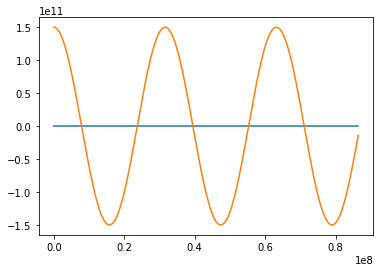

In [22]:
#Sun and Earth time and x position plot
plt.plot(setime,seposition[:,0,0])
plt.plot(setime,seposition[:,1,0])

(-164745771357.01562,
 164568845203.08282,
 -164657269243.68912,
 164657280300.28323)

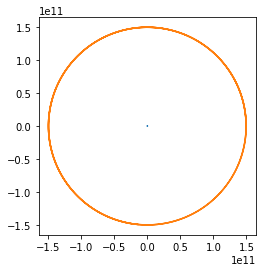

In [23]:
# Sun and Earth x-y trace
plt.plot(seposition[:,0,0],seposition[:,0,1])
plt.plot(seposition[:,1,0],seposition[:,1,1])
plt.axis('scaled')


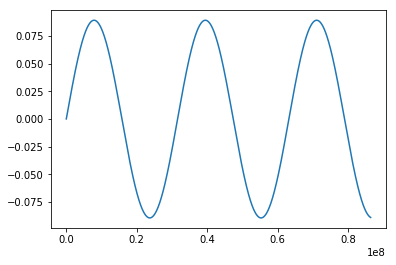

In [24]:
plt.plot(setime,sevelocity[:,0,0])# Plot of time and Sun X velocity

### 9.

Repeat the Earth-Sun calculation and plots, starting from similar initial conditions but
decreasing the initial velocities by a factor of 2. 

In [25]:
setime,seposition1,sevelocity1 = Motion(seinmass,seinpos,seinvect/2,8.64e7,8.64e4)

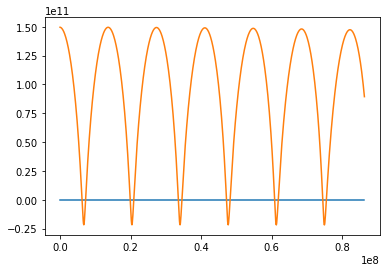

In [26]:
#Sun and Earth time and x position plot
plt.plot(setime,seposition1[:,0,0])
plt.plot(setime,seposition1[:,1,0])

(-30367801100.220974, 158146716237.00974, -76897443299.8081, 62923332107.64664)

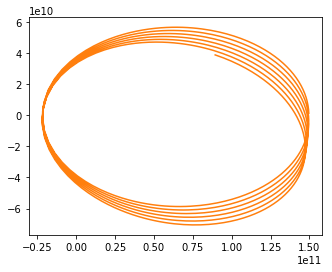

In [27]:
# Sun and Earth x-y trace
plt.plot(seposition1[:,0,0],seposition1[:,0,1])
plt.plot(seposition1[:,1,0],seposition1[:,1,1])
plt.axis('scaled')


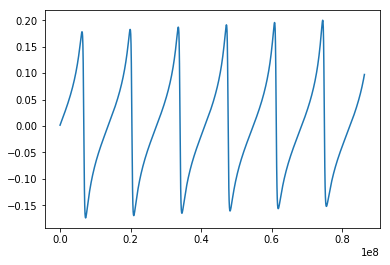

In [28]:
plt.plot(setime,sevelocity1[:,0,0])# Plot of time and Sun X velocity

### 10.

In [29]:
df = pd.read_csv('kepler16.txt',sep=" ",header = None,skiprows=1,names =['m','x','y','z','vx','vy','vz'])
df

,m,x,y,z,vx,vy,vz
0,1.371800e+30,7.634900e+09,-965870.0,1.844700e+09,-1050.2,-6.8224,13030.0
1,4.028700e+29,-2.599800e+10,3288900.0,-6.281300e+09,3576.0,23.2310,-44368.0
2,6.325000e+26,3.776100e+10,-40923000.0,8.193400e+10,-36298.0,-10.8120,17020.0


### 11.

Text(0, 0.5, 'Z (AU)')

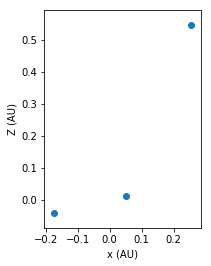

In [30]:
df= np.array(df)# 1 m = 6.68459e-12 AU
Kmasses, Kinpositions, Kinvelocities = df[:,0],df[:,1:4],df[:,4:7]
# extract the x and y components of all the particles
kx = Kinpositions[:,0]*6.68459e-12
kz = Kinpositions[:,2]*6.68459e-12
# plot these the positions of these particles
plt.scatter(kx, kz)
plt.axis('scaled')
plt.xlabel('x (AU)')
plt.ylabel('Z (AU)')

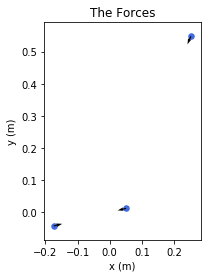

In [31]:
# pull out the x, y, z components of the position
kx = Kinpositions[:,0]*6.68459e-12
kz = Kinpositions[:,2]*6.68459e-12
# pull out the x, y, z, components of the force on the P0
Fx = netforcevector(Kmasses,Kinpositions)[:,0]
Fz = netforcevector(Kmasses,Kinpositions)[:,2]

# plot the prac (dot + its force)
plt.scatter(kx, kz, color='royalblue', s=30)
for i in range(0,len(Fx)):
    
    plt.quiver(kx[i],kz[i],Fx[i], Fz[i])


plt.axis('scaled')
plt.xlabel('x (m)')
plt.ylabel('y (m)')
plt.title('The Forces');

### 12.

Use N-body code to calculate the planet and stars’ orbits. Evolve the system for a
total of 500 days, using a time step of ∆t = 0.5 days. 

In [32]:
ktime,kposition,kvelocity = Motion(Kmasses,Kinpositions,Kinvelocities,8.64e7/2,8.64e4/2)

(-130339490026.01938,
 119591674300.02873,
 -152825320715.8758,
 103521628793.72397)

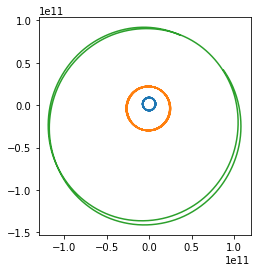

In [33]:
# x-z trace
plt.plot(kposition[:,0,0],kposition[:,0,2])
plt.plot(kposition[:,1,0],kposition[:,1,2])
plt.plot(kposition[:,2,0],kposition[:,2,2])
plt.axis('scaled')

### 13.

) Make an animation, showing the motion of the three particles over that 500 days. From
frame to frame in this movie, the positions of the particles should move and a text label (perhaps
the title of the plot) should reflect the passage of time.

In [ ]:
import matplotlib.animation as ani
#from whatisoneyear import *
# create a movie writer object, to record at 5 frames/s
#wri = ani.FFMpegWriter(fps=10)
# on other computers, you made want PillowWriter instead:
wri = ani.PillowWriter(fps=5)
#
# ...and on your own computer, you may need to install 
# some extra modules to make animation work. Ask for help!

# create a figure, 5"x5" in size
fig = plt.figure(figsize=(5,5))

# set things up to save frames to a movie:
#   fig = the figure the writer will record from
#  'swarm.mp4' = the name of the movie file to save
#   100 = dpi (dots per inch)
with wri.saving(fig, 'ksapn.gif', 100):
    for i in range(0,len(ktime)):
        
        # provide an update of how far we've gone
        print('The Day is at {}'.format(ktime[i]*1.15741e-5))#Covert second to day
        
        # clear the previous plot
        plt.cla()
        
        # create some new x and y values`
        #x, y = np.random.normal(center, size=[2,1000])
        
        # plot the x and y values
        plt.scatter(kposition[:,0,0][i],kposition[:,0,2][i])
        plt.scatter(kposition[:,1,0][i],kposition[:,1,2][i])
        plt.scatter(kposition[:,2,0][i],kposition[:,2,2][i])
        plt.title('The Day is at {}'.format(ktime[i]*1.15741e-5))
        plt.axis('scaled')

        # save the current plot as one frame of the movie
        wri.grab_frame()

### 14.

Will use random cube one and same time span and step above

In [34]:
df1 = pd.read_csv('sunearthmoon.txt',sep=" ",header = None,skiprows=1,names =['m','x','y','z','vx','vy','vz'])
df1

,m,x,y,z,vx,vy,vz
0,1.988500e+30,5.258700e+08,5.345100e+08,-23751000.0,-3.7994,11.737,0.078384
1,5.972200e+24,1.038800e+11,1.067600e+11,-28411000.0,-21846.0000,20666.000,0.440490
2,7.349000e+22,1.041700e+11,1.065000e+11,-15495000.0,-21216.0000,21458.000,-84.850000


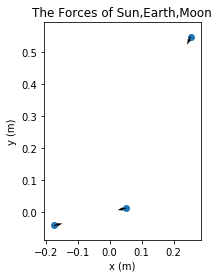

In [35]:
df1= np.array(df1)# 1 m = 6.68459e-12 AU
SEMmasses, SEMinpositions, SEMinvelocities = df[:,0],df[:,1:4],df[:,4:7]
# extract te x and y components of all the particles
SEMx = SEMinpositions[:,0]*6.68459e-12
SEMz = SEMinpositions[:,2]*6.68459e-12
# plot these the positions of these particles
plt.scatter(SEMx, SEMz)
plt.axis('scaled')
plt.xlabel('x (AU)')
plt.ylabel('Z (AU)')
#plt.show()
# pull out the x, y, z components of the position
kx = Kinpositions[:,0]*6.68459e-12
kz = Kinpositions[:,2]*6.68459e-12
# pull out the x, y, z, components of the force on the P0
SEMFx = netforcevector(SEMmasses,SEMinpositions)[:,0]
SEMFz = netforcevector(SEMmasses,SEMinpositions)[:,2]

# plot the prac (dot + its force)
#plt.scatter(kx, kz, color='royalblue', s=30)
for i in range(0,len(SEMFx)):
    
    plt.quiver(SEMx[i],SEMz[i],SEMFx[i], SEMFz[i])


plt.axis('scaled')
plt.xlabel('x (m)')
plt.ylabel('y (m)')
plt.title('The Forces of Sun,Earth,Moon');

In [36]:
SEMtime,SEMposition,SEMvelocity = Motion(SEMmasses,SEMinpositions,SEMinvelocities,8.64e7/2,8.64e4/2)# 500DAYS AND 0.5DAYS AS STEP

(-130339490026.01938,
 119591674300.02873,
 -152825320715.8758,
 103521628793.72397)

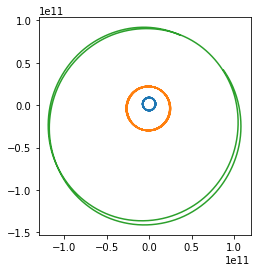

In [37]:
# x-z trace
plt.plot(SEMposition[:,0,0],SEMposition[:,0,2])#SUN
plt.plot(SEMposition[:,1,0],SEMposition[:,1,2])#EARTH
plt.plot(SEMposition[:,2,0],SEMposition[:,2,2])#MOON
plt.axis('scaled')

### 15.

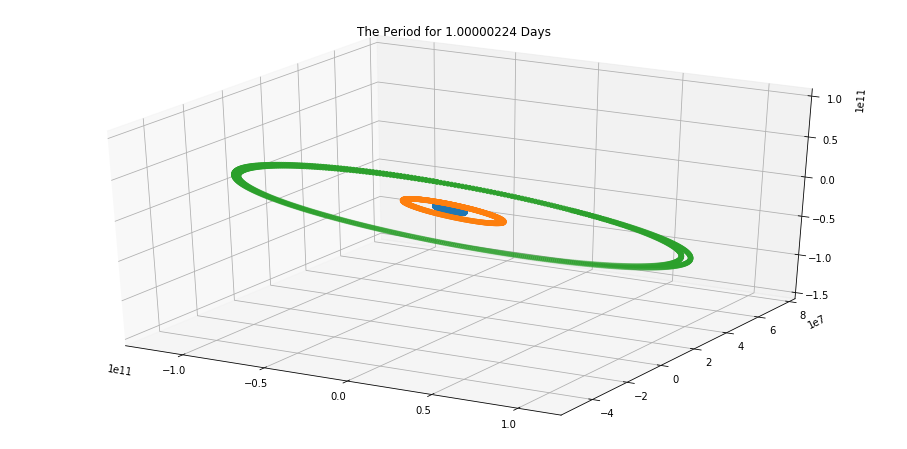

In [38]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(16,8))
#ax = fig.add_subplot(111, projection='3d')
ax = plt.axes(projection='3d')

# Data for a three-dimensional li
#ax.plot3D(kposition[:,0,0], kposition[:,0,1], kposition[:,0,2])

# Data for three-dimensional scattered points

ax.scatter3D(SEMposition[:,0,0], SEMposition[:,0,1], SEMposition[:,0,2])
ax.scatter3D(SEMposition[:,1,0], SEMposition[:,1,1], SEMposition[:,1,2])
ax.scatter3D(SEMposition[:,2,0], SEMposition[:,2,1], SEMposition[:,2,2])
#ax.axis('scaled')
ax = plt.title('The Period for {} Days'.format(ktime[i]*1.15741e-5))
#ax = plt.axis('scaled')

The Day is at 0.0
The Day is at 0.50000112
The Day is at 1.00000224
The Day is at 1.50000336


D:\Anaconda3\lib\site-packages\matplotlib\figure.py:98: MatplotlibDeprecationWarning: 
Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  "Adding an axes using the same arguments as a previous axes "


The Day is at 2.00000448
The Day is at 2.5000056
The Day is at 3.00000672
The Day is at 3.50000784
The Day is at 4.00000896
The Day is at 4.50001008
The Day is at 5.0000112
The Day is at 5.50001232
The Day is at 6.00001344
The Day is at 6.50001456
The Day is at 7.00001568
The Day is at 7.5000168
The Day is at 8.00001792
The Day is at 8.50001904
The Day is at 9.00002016
The Day is at 9.50002128
The Day is at 10.0000224
The Day is at 10.50002352
The Day is at 11.00002464
The Day is at 11.50002576
The Day is at 12.00002688
The Day is at 12.500028
The Day is at 13.00002912
The Day is at 13.50003024
The Day is at 14.00003136
The Day is at 14.50003248
The Day is at 15.0000336
The Day is at 15.50003472
The Day is at 16.00003584
The Day is at 16.50003696
The Day is at 17.00003808
The Day is at 17.5000392
The Day is at 18.00004032
The Day is at 18.50004144
The Day is at 19.00004256
The Day is at 19.50004368
The Day is at 20.0000448
The Day is at 20.500045919999998
The Day is at 21.00004704
The 

The Day is at 157.5003528
The Day is at 158.00035392
The Day is at 158.50035504
The Day is at 159.00035616
The Day is at 159.50035728
The Day is at 160.0003584
The Day is at 160.50035952
The Day is at 161.00036064
The Day is at 161.50036176
The Day is at 162.00036288
The Day is at 162.500364
The Day is at 163.00036512
The Day is at 163.50036624
The Day is at 164.00036735999998
The Day is at 164.50036848
The Day is at 165.0003696
The Day is at 165.50037072
The Day is at 166.00037183999999
The Day is at 166.50037296
The Day is at 167.00037408
The Day is at 167.5003752
The Day is at 168.00037632
The Day is at 168.50037744
The Day is at 169.00037856
The Day is at 169.50037968
The Day is at 170.0003808
The Day is at 170.50038192
The Day is at 171.00038304
The Day is at 171.50038416
The Day is at 172.00038528
The Day is at 172.5003864
The Day is at 173.00038752
The Day is at 173.50038864
The Day is at 174.00038976
The Day is at 174.50039088
The Day is at 175.000392
The Day is at 175.50039311

The Day is at 308.00068992
The Day is at 308.50069104
The Day is at 309.00069215999997
The Day is at 309.50069328
The Day is at 310.0006944
The Day is at 310.50069552
The Day is at 311.00069664
The Day is at 311.50069776
The Day is at 312.00069888
The Day is at 312.5007
The Day is at 313.00070112
The Day is at 313.50070224
The Day is at 314.00070336
The Day is at 314.50070448
The Day is at 315.0007056
The Day is at 315.50070672
The Day is at 316.00070784
The Day is at 316.50070896
The Day is at 317.00071008
The Day is at 317.5007112
The Day is at 318.00071232
The Day is at 318.50071343999997
The Day is at 319.00071456
The Day is at 319.50071568
The Day is at 320.0007168
The Day is at 320.50071792
The Day is at 321.00071904
The Day is at 321.50072016
The Day is at 322.00072128
The Day is at 322.5007224
The Day is at 323.00072352
The Day is at 323.50072464
The Day is at 324.00072576
The Day is at 324.50072688
The Day is at 325.000728
The Day is at 325.50072912
The Day is at 326.00073024


The Day is at 458.50102704
The Day is at 459.00102816
The Day is at 459.50102928
The Day is at 460.0010304
The Day is at 460.50103151999997
The Day is at 461.00103264
The Day is at 461.50103376
The Day is at 462.00103488
The Day is at 462.501036
The Day is at 463.00103712
The Day is at 463.50103824
The Day is at 464.00103936
The Day is at 464.50104048
The Day is at 465.0010416
The Day is at 465.50104272
The Day is at 466.00104384
The Day is at 466.50104496
The Day is at 467.00104608
The Day is at 467.5010472
The Day is at 468.00104832
The Day is at 468.50104944
The Day is at 469.00105056
The Day is at 469.50105168
The Day is at 470.00105279999997
The Day is at 470.50105392
The Day is at 471.00105504
The Day is at 471.50105616
The Day is at 472.00105728
The Day is at 472.5010584
The Day is at 473.00105952
The Day is at 473.50106064
The Day is at 474.00106175999997
The Day is at 474.50106288
The Day is at 475.001064
The Day is at 475.50106512
The Day is at 476.00106624
The Day is at 476.

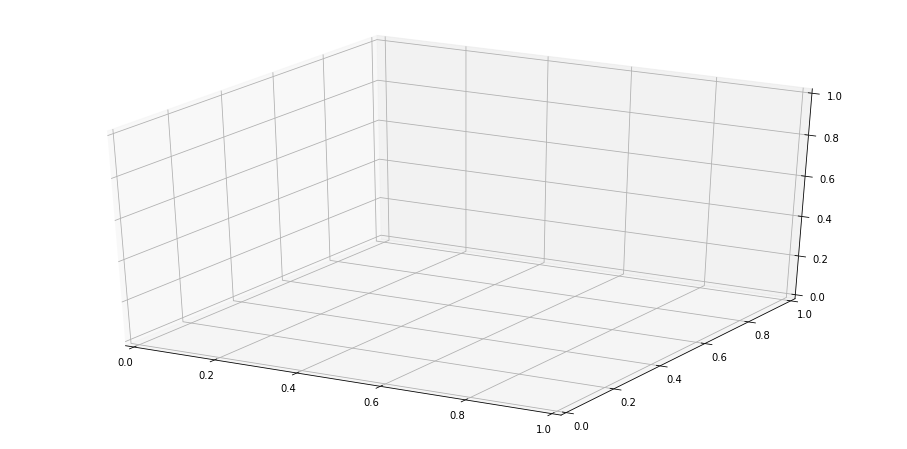

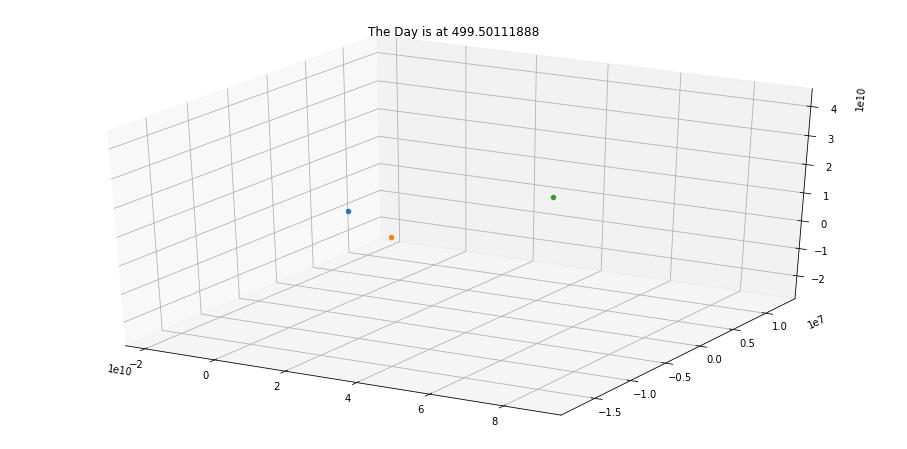

In [40]:
import matplotlib.animation as ani
from mpl_toolkits.mplot3d import Axes3D
#from whatisoneyear import *
# create a movie writer object, to record at 5 frames/s
#wri = ani.FFMpegWriter(fps=10)
# on other computers, you made want PillowWriter instead:
wri = ani.PillowWriter(fps=5)
#
# ...and on your own computer, you may need to install 
# some extra modules to make animation work. Ask for help!

fig = plt.figure(figsize=(16,8))
#ax = fig.add_subplot(111, projection='3d')
ax = plt.axes(projection='3d')

# set things up to save frames to a movie:
#   fig = the figure the writer will record from
#  'swarm.mp4' = the name of the movie file to save
#   100 = dpi (dots per inch)
fig = plt.figure(figsize=(16,8))
with wri.saving(fig, '4D.gif', 100):
    
    for i in range(0,len(SEMtime)):
        
        # provide an update of how far we've gone
        print('The Day is at {}'.format(SEMtime[i]*1.15741e-5))#Covert second to day
        
        ax = plt.cla()

        #ax = fig.add_subplot(111, projection='3d')
        ax = plt.axes(projection='3d')  
        # clear the previous plot
        # create some new x and y values`
        #x, y = np.random.normal(center, size=[2,1000])
        
       

        # Data for a three-dimensional li
        #ax.plot3D(kposition[:,0,0], kposition[:,0,1], kposition[:,0,2])

        # Data for three-dimensional scattered points

        ax.scatter3D(SEMposition[:,0,0][i], SEMposition[:,0,1][i], SEMposition[:,0,2][i])
        ax.scatter3D(SEMposition[:,1,0][i], SEMposition[:,1,1][i], SEMposition[:,1,2][i])
        ax.scatter3D(SEMposition[:,2,0][i], SEMposition[:,2,1][i], SEMposition[:,2,2][i])
        #ax = plt.xlim(-2,2)
        #ax = plt.xlim(-4,2)
        
        #ax.axis('scaled')
        ax = plt.title('The Day is at {}'.format(ktime[i]*1.15741e-5))
        #ax = plt.axis('scaled')

        # save the current plot as one frame of the movie
        wri.grab_frame()